In [47]:
from tkinter import W
from trace import Trace
import pandas as pd
import numpy as np
import nltk
import pickle
import csv
#nltk.download()

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, f1_score, confusion_matrix, recall_score
# from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\larao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\larao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\larao\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\larao\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\larao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
import pickle
hate_data, hate_labels = [], [] 
with open("dataset/hate_dataset", "rb") as fp:     
    hate_data= pickle.load(fp)
with open("dataset/hate_labels", "rb") as fp:     
    hate_labels= pickle.load(fp)

#print(hate_data)


In [49]:
hate_data = pd.DataFrame(hate_data)

hate_data[0].dropna(inplace=True)
hate_data[0] = [entry.lower() for entry in hate_data[0]] # all lowercase
hate_data[0]= [word_tokenize(entry) for entry in hate_data[0]] # tokenization
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ #seperate adjectives
tag_map['V'] = wn.VERB #seperate verbs
tag_map['R'] = wn.ADV #seperate adverbs

In [50]:
for index,entry in enumerate(hate_data[0]):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    hate_data.loc[index,'text_final'] = str(Final_words)
    
print("Finished preprocessing")
    

Finished preprocessing


In [51]:
print(hate_data['text_final'])

0        ['hurray', 'save', 'u', 'many', 'way', 'potus'...
1        ['would', 'young', 'fight', 'age', 'men', 'vas...
2        ['kamalaharris', 'illegals', 'dump', 'kid', 'b...
3        ['ny', 'time', 'white', 'state', 'pose', 'arra...
4        ['orban', 'brussels', 'european', 'leader', 'i...
                               ...                        
26810                   ['cry', 'hard', 'waifu', 'faggot']
26811    ['oh', 'boy', 'come', 'long', 'venting', 'post...
26812    ['dont', 'know', 'exactly', 'feel', 'course', ...
26813    ['op', 'stop', 'faggot', 'post', 'video', 'nex...
26814    ['clue', 'whos', 'point', 'time', 'need', 'get...
Name: text_final, Length: 26815, dtype: object


In [52]:
hate_labels = pd.DataFrame(hate_labels)

In [53]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(hate_data['text_final'],hate_labels[0],test_size=0.3)
print(Test_X)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
print(Train_X.shape)
print(Train_Y.shape)

26485    ['regardless', 'stance', 'spamming', 'message'...
7021                  ['award', 'deserve', 'life', 'http']
8985     ['money', 'ca', 'buy', 'happiness', 'buy', 'pu...
22129    ['oh', 'honey', 'know', 'surround', 'literally...
22044    ['quick', 'head', 'turn', 'starter', 'gun', 'g...
                               ...                        
19554    ['intj', 'introvert', 'intuitive', 'intuitive'...
24352    ['cunt', 'turn', 'kid', 'little', 'cunt', 'wou...
23268        ['cunt', 'execute', 'bad', 'way', 'possible']
20347    ['einstein', 'say', 'nothing', 'go', 'faster',...
22517    ['pussy', 'pas', 'deny', 'pull', 'stop', 'even...
Name: text_final, Length: 8045, dtype: object
(18770,)
(18770,)


In [54]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(hate_data['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
print(Test_X)

26485    ['regardless', 'stance', 'spamming', 'message'...
7021                  ['award', 'deserve', 'life', 'http']
8985     ['money', 'ca', 'buy', 'happiness', 'buy', 'pu...
22129    ['oh', 'honey', 'know', 'surround', 'literally...
22044    ['quick', 'head', 'turn', 'starter', 'gun', 'g...
                               ...                        
19554    ['intj', 'introvert', 'intuitive', 'intuitive'...
24352    ['cunt', 'turn', 'kid', 'little', 'cunt', 'wou...
23268        ['cunt', 'execute', 'bad', 'way', 'possible']
20347    ['einstein', 'say', 'nothing', 'go', 'faster',...
22517    ['pussy', 'pas', 'deny', 'pull', 'stop', 'even...
Name: text_final, Length: 8045, dtype: object


In [55]:
def conf_matrix_table(cf_matrix):
    group_names = ['TN','FP','FN','TP']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, cf_matrix.flatten(), group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
    plt.show()

Naive Bayes Accuracy Score ->  82.89620882535736  alpha =  0.001
Naive Bayes Accuracy Score ->  83.05779987569919  alpha =  0.01
Naive Bayes Accuracy Score ->  83.23182100683655  alpha =  0.1
Naive Bayes Accuracy Score ->  82.53573648228713  alpha =  1
Naive Bayes Accuracy Score ->  70.80174021131137  alpha =  10


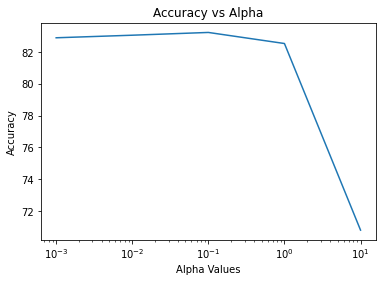

Optimum alpha = 0.1
Naive Bayes Accuracy Score ->  83.23182100683655
Precision ->  0.692195574400424
Recall ->  0.9950476190476191
F1 Score ->  0.816441353442213


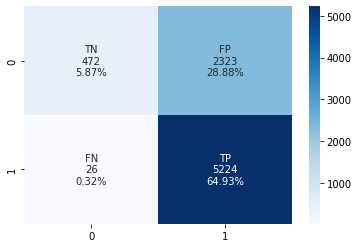

True Positive 5224
True Negative 472
False Positive 2323
False Negative 26
NPV ->  0.9477911646586346
FPR ->  0.8311270125223613
FDR ->  0.307804425599576


In [56]:
# fit the training dataset on the NB classifier
alphas = [0.001, 0.01, 0.1, 1, 10]
accuracy_scores = []
for a in alphas:
    Naive = naive_bayes.MultinomialNB(alpha=a)
    Naive.fit(Train_X_Tfidf,Train_Y)
    predictions_NB = Naive.predict(Test_X_Tfidf)
    acc = accuracy_score(predictions_NB, Test_Y)*100
    accuracy_scores.append(acc)
    print("Naive Bayes Accuracy Score -> ", acc, " alpha = ", a)

#plot accuricies vs alphas
plt.semilogx(alphas, accuracy_scores)
plt.title("Accuracy vs Alpha")
plt.xlabel("Alpha Values")
plt.ylabel("Accuracy")
plt.show()

#optimum parameter
opt_i = np.argmax(accuracy_scores)
print("Optimum alpha =", alphas[opt_i])
print("Naive Bayes Accuracy Score -> ", accuracy_scores[opt_i])
print("Precision -> ", precision_score(Test_Y, predictions_NB, average="binary"))
print("Recall -> ", recall_score(Test_Y, predictions_NB, average="binary"))
print("F1 Score -> ", f1_score(Test_Y, predictions_NB, average="binary"))
cm = confusion_matrix(Test_Y, predictions_NB, labels=[0, 1])
conf_matrix_table(cm)
tn, fp, fn, tp = confusion_matrix(list(Test_Y), list(predictions_NB), labels=[0, 1]).ravel()
print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

npv = tn / (tn+fn)
print("NPV -> ", npv)
fpr = fp / (fp+tn)
print("FPR -> ", fpr)
fdr = fp / (tp+fp)
print("FDR -> ", fdr)

In [44]:
#SVM
#print(Train_Y.shape)
# gamma = 2**-4, 2**-3, 2**-2, 2**-1, 2**0, 2**1
# c = 10**-3, 10**-2, 10**-1, 10**0, 10**1
SVM = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=2**1)
SVM.fit(Train_X_Tfidf,Train_Y)
predictions_SVM = SVM.predict(Test_X_Tfidf)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print("Precision -> ", precision_score(Test_Y, predictions_SVM, average="binary"))
print("Recall -> ", recall_score(Test_Y, predictions_SVM, average="binary"))
print("F1 Score -> ", f1_score(Test_Y, predictions_SVM, average="binary"))
cm = confusion_matrix(Test_Y, predictions_SVM, labels=[0, 1])
print("Confusion Matrix -> ", cm)

tn, fp, fn, tp = confusion_matrix(list(Test_Y), list(predictions_SVM), labels=[0, 1]).ravel()
print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

npv = tn / (tn+fn)
print("NPV -> ", npv)
fpr = fp / (fp+tn)
print("FPR -> ", fpr)
fdr = fp / (tp+fp)
print("FDR -> ", fdr)

# filename = 'finalized_model.sav'
# pickle.dump(predictions_SVM, open(filename, 'wb'))

SVM Accuracy Score ->  90.61528899937849
Precision ->  0.9352179034157833
Recall ->  0.9180959722489882
F1 Score ->  0.9265778469318292
Confusion Matrix ->  [[2526  330]
 [ 425 4764]]
True Positive 4764
True Negative 2526
False Positive 330
False Negative 425
NPV ->  0.8559810233819044
FPR ->  0.11554621848739496
FDR ->  0.06478209658421673


In [45]:
sentence = "trans women are real women" #input("Please enter a sentence:")
hate_data2 = []
hate_data2.append(sentence)

hate_data2 = pd.DataFrame(hate_data2)

hate_data2[0].dropna(inplace=True)
hate_data2[0] = [entry.lower() for entry in hate_data2[0]] # all lowercase
hate_data2[0]= [word_tokenize(entry) for entry in hate_data2[0]] # tokenization
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ #seperate adjectives
tag_map['V'] = wn.VERB #seperate verbs
tag_map['R'] = wn.ADV #seperate adverbs

for index,entry in enumerate(hate_data2[0]):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    hate_data2.loc[index,'text_final'] = str(Final_words)
    
print("Finished preprocessing")

print(hate_data2)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(hate_data['text_final'])
Test_X_Tfidf = Tfidf_vect.transform(hate_data2['text_final'])
print(Test_X_Tfidf.shape)
predictions_SVM = SVM.predict(Test_X_Tfidf)
print(predictions_SVM)

Finished preprocessing
                                  0                           text_final
0  [trans, women, are, real, women]  ['trans', 'woman', 'real', 'woman']
(1, 5000)
[1]
